In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

path = r"Data\\"

In [8]:
data = pd.read_csv(path + 'prepared_data.csv', index_col = 0)
data.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,BsmtQual_Ex,TotRmsAbvGrd,...,MSZoning_RM,HeatingQC_TA,Foundation_CBlock,GarageType_Detchd,MasVnrType_None,GarageFinish_Unf,BsmtQual_TA,FireplaceQu_No Fireplace,KitchenQual_TA,ExterQual_TA
0,208500,7,1710,2,548,856,856,2,0.0,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,181500,6,1262,2,460,1262,1262,2,0.0,6,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,223500,7,1786,2,608,920,920,2,0.0,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,140000,7,1717,3,642,756,961,1,0.0,7,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
4,250000,8,2198,3,836,1145,1145,2,0.0,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot: xlabel='SalePrice', ylabel='index'>

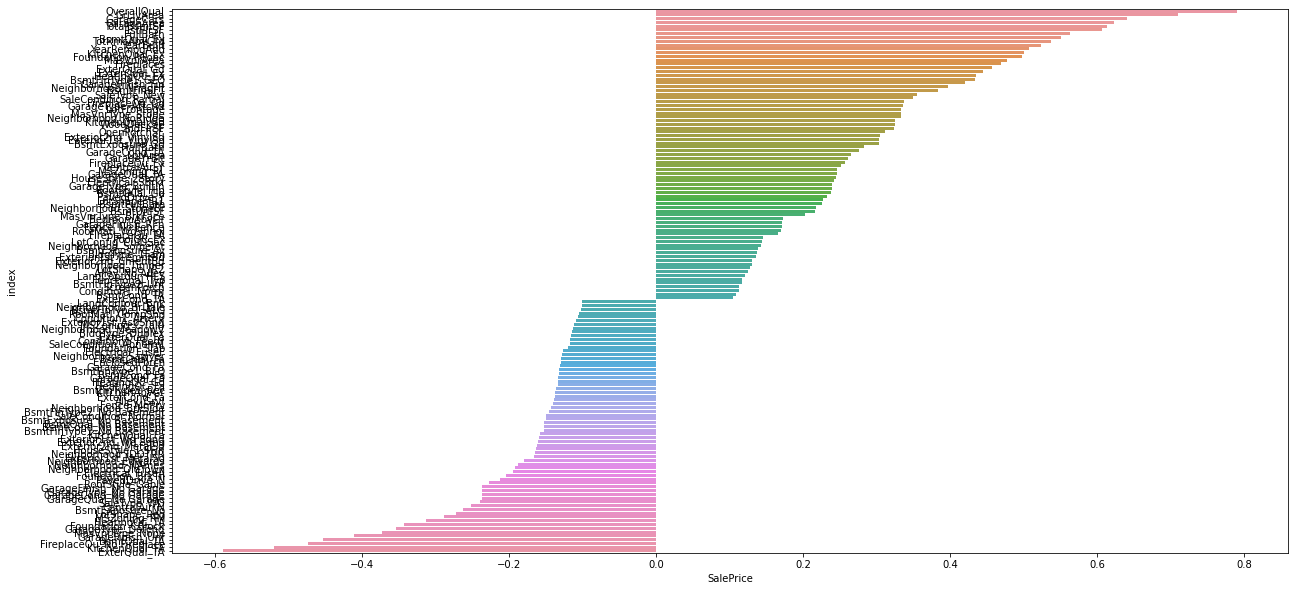

In [17]:
corr = data.corr()['SalePrice'].reset_index().sort_values(by = 'SalePrice', ascending = False).loc[corr['index'] != 'SalePrice']
fig = plt.figure(figsize=(20,10))
sns.barplot(data = corr, y = 'index', x = 'SalePrice')

In [26]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x = data.drop('SalePrice', axis = 1)
y = data['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.3)
reg = XGBRegressor(eval_metric= 'rmse', n_estimators = 10000, early_stopping_rounds = 50)
reg.fit(x_train, y_train, 
        eval_set=[(x_train, y_train), (x_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:139229.90942	validation_1-rmse:145505.33688
[64]	validation_0-rmse:565.87489	validation_1-rmse:34744.61620


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [27]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.7690227970829527